In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [67]:
# loading data
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [68]:
# before processing the data for clustering, first analyze the data

# display the first 5 rows of data_train
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# statistical data analysis
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


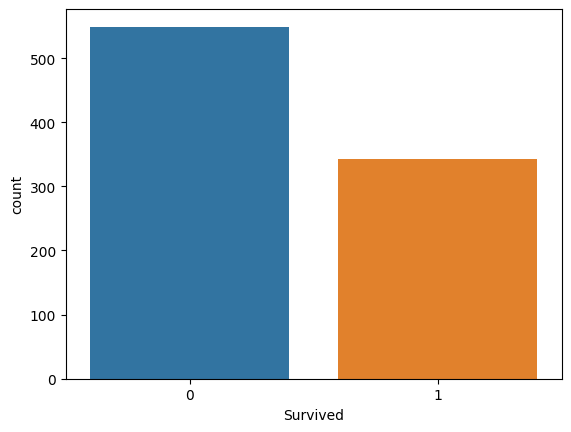

In [70]:
# distribution of surviving and dead passengers
sns.countplot(x='Survived', data=data_train)
plt.show()

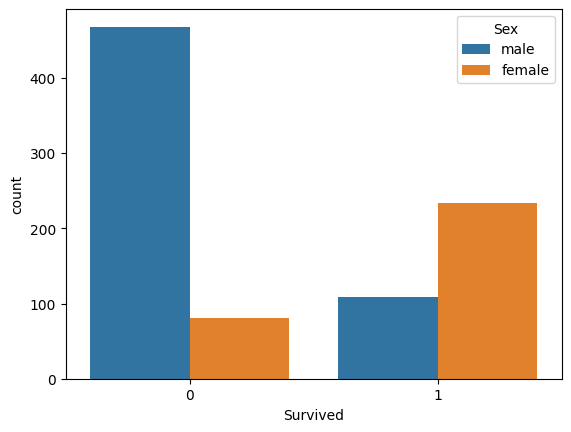

In [71]:
# survival by sex
sns.countplot(x='Survived', hue='Sex', data=data_train)
plt.show()

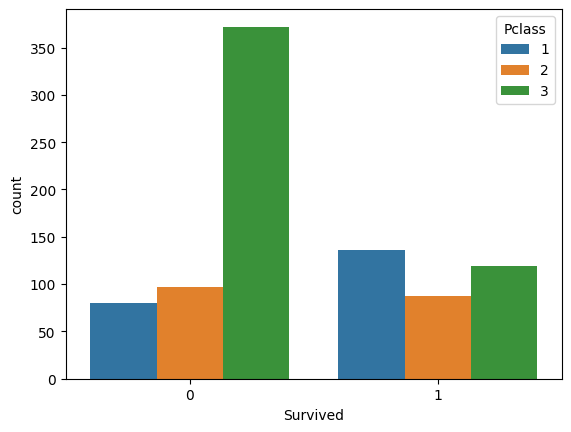

In [72]:
# dependence of survival on cabin class
sns.countplot(x='Survived', hue='Pclass', data=data_train)
plt.show()

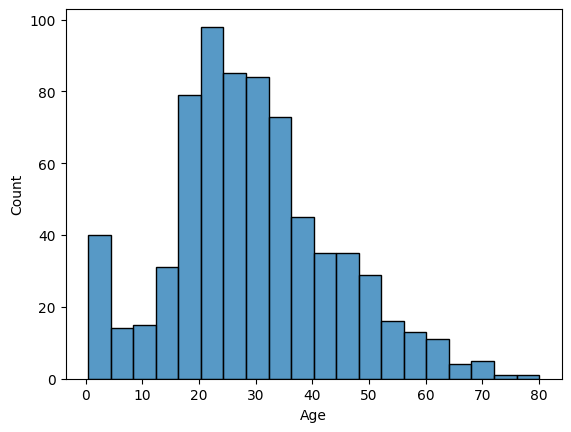

In [73]:
# passenger age distribution
sns.histplot(data=data_train, x='Age', bins=20)
plt.show()

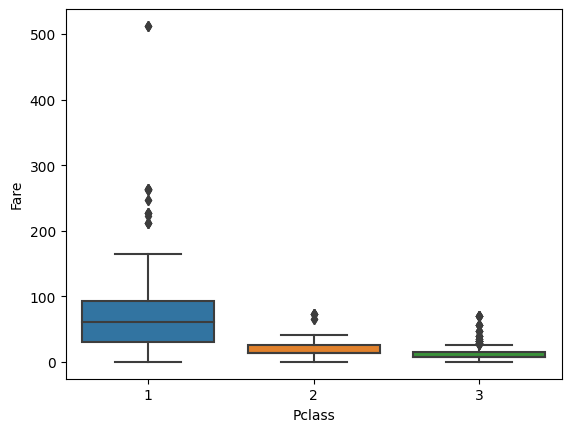

In [74]:
# dependence of the ticket price on the class of the cabin
sns.boxplot(x='Pclass', y='Fare', data=data_train)
plt.show()

In [75]:
# After analyzing the data, the following conclusions can be drawn:

# 1. In general, more than half of the passengers from the Titanic died in the disaster.
# 2. Most passengers were between 20 and 40 years old, 
#    with the highest number of passengers aged 24.
# 3. Women had a higher chance of survival than men
# 4. Upper-class passengers had a higher probability of survival, 
#    which may be due to evacuation priority for wealthier passengers 
#    and higher status on board.

In [76]:
# check which columns contain missing values
print(data_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [77]:
def fill_age(df):
    for i in range(1, 4):
        for j in range(0, 2):
            # average age for each combination of gender and ticket class
            mean_age = df[(df['Sex'] == j) & (df['Pclass'] == i)]['Age'].mean()
            # fill in the missing values ​​according to these values
            df.loc[(df['Age'].isnull()) & (df['Sex'] == j) & (df['Pclass'] == i), 'Age'] = mean_age
    return df

In [78]:
def change_columns(df):
    
    # Drop unnecessary columns
    df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

    # Convert 'Sex' column from strings to integers
    df['Sex'] = df['Sex'].map({ 'male': 0, 'female': 1 })

    # Fill missing values in 'Age' column 
    df = fill_age(df)

    # Fill missing values in 'Embarked' column with most common value
    most_common_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(most_common_embarked, inplace=True)

    # Fill missing values in 'Fare' column with median fare
    median_fare = df['Fare'].median()
    df['Fare'].fillna(median_fare, inplace=True)
 
    return pd.get_dummies(df)

In [79]:
# print(change_columns(data_train).isnull().sum())
change_columns(data_train)

print(data_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to perform clustering and visualization of results
def cluster_and_plot(X, n_clusters, algorithm):
    # Data Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Data clustering
    clusterer = algorithm(n_clusters=n_clusters, random_state=42)
    clusters = clusterer.fit_predict(X_scaled)

    # Visualization of results
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="viridis")
    plt.title(f"{algorithm.__name__} with {n_clusters} clusters")

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


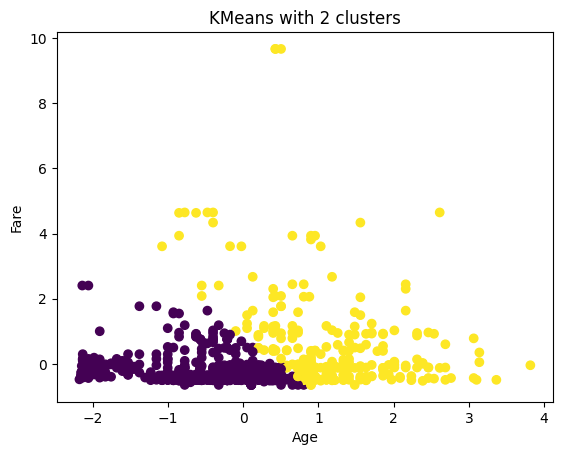

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


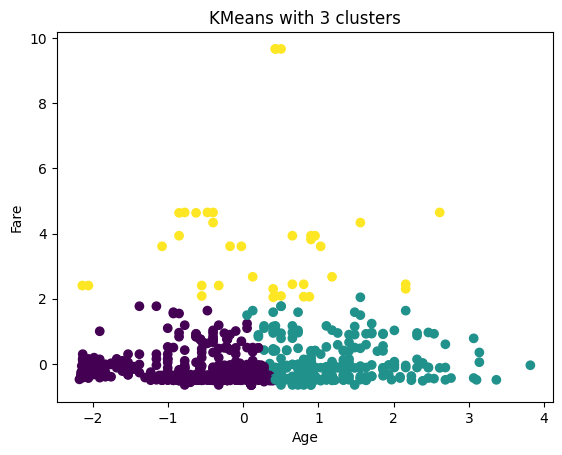

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


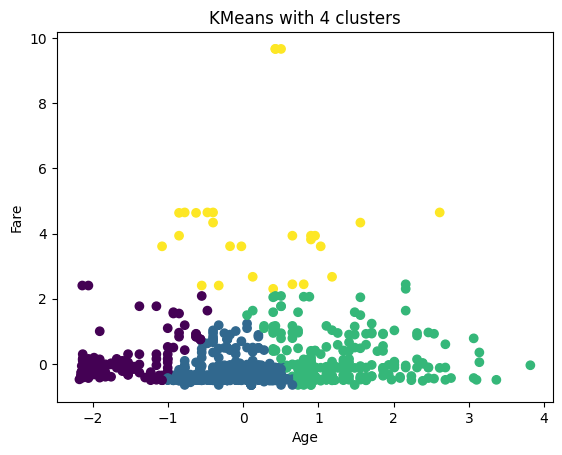

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


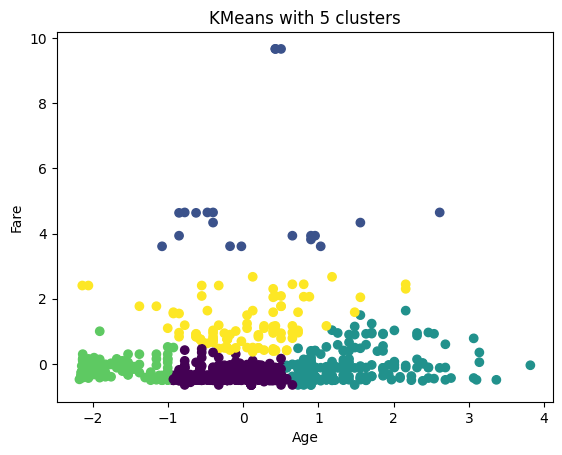

In [81]:
# Clustering using "Age" and "Fare" columns

X1 = data_train[["Age", "Fare"]]
cluster_and_plot(X1, 2, KMeans)
cluster_and_plot(X1, 3, KMeans)
cluster_and_plot(X1, 4, KMeans)
cluster_and_plot(X1, 5, KMeans)

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


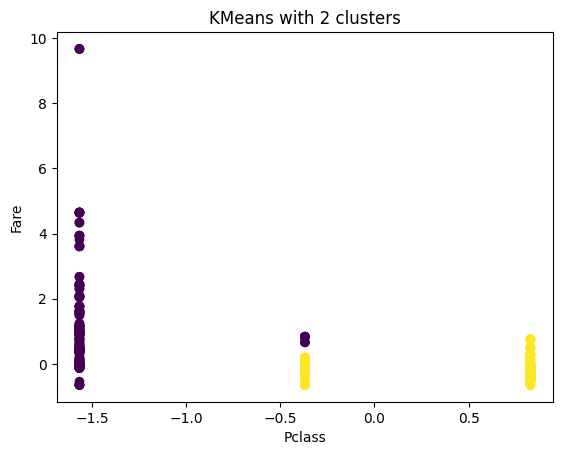

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


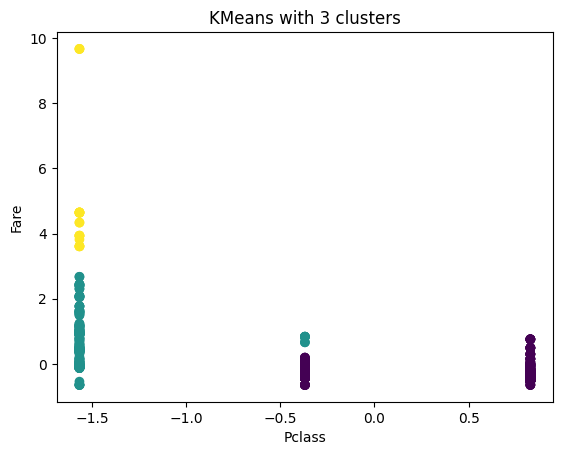

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


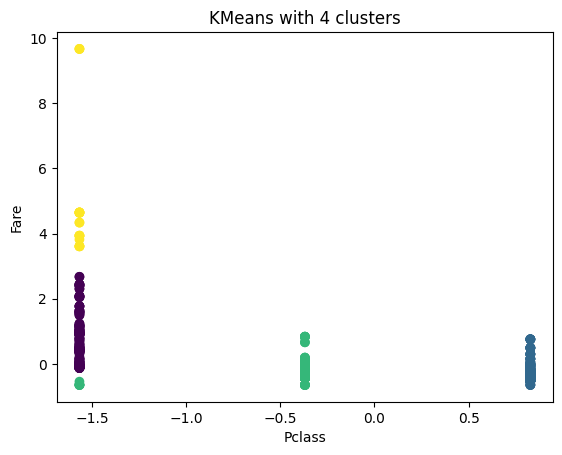

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


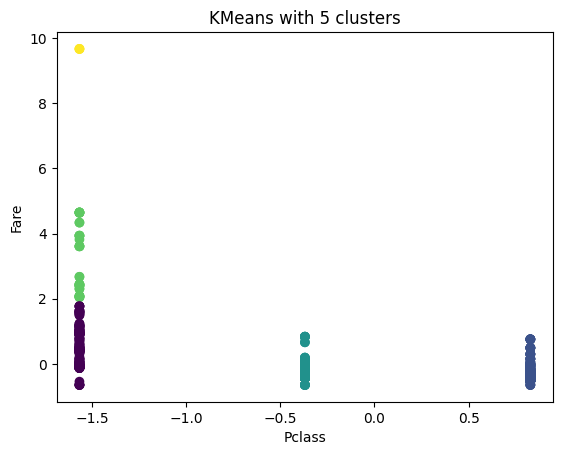

In [82]:
# Clustering using "Pclass" and "Fare" columns

X2 = data_train[["Pclass", "Fare"]]
cluster_and_plot(X2, 2, KMeans)
cluster_and_plot(X2, 3, KMeans)
cluster_and_plot(X2, 4, KMeans)
cluster_and_plot(X2, 5, KMeans)

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


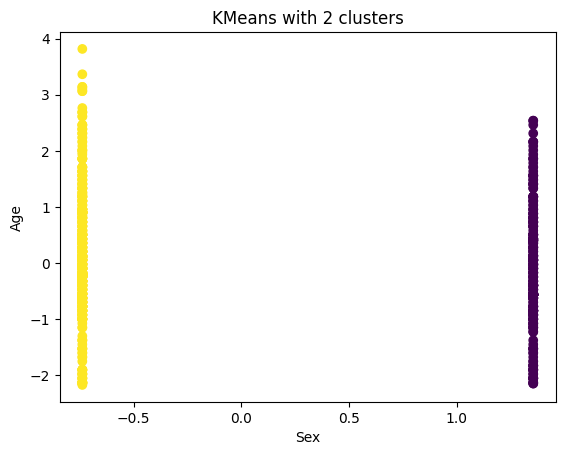

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


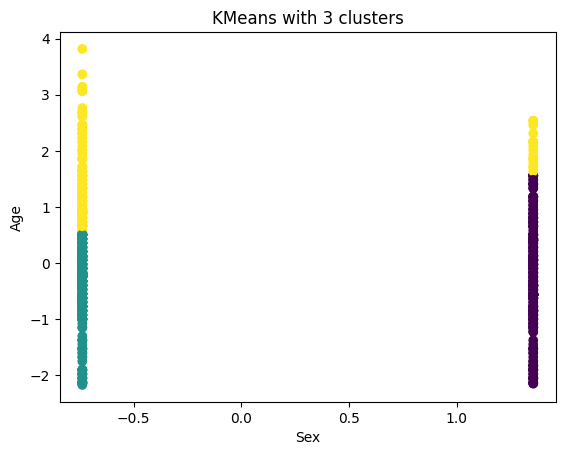

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


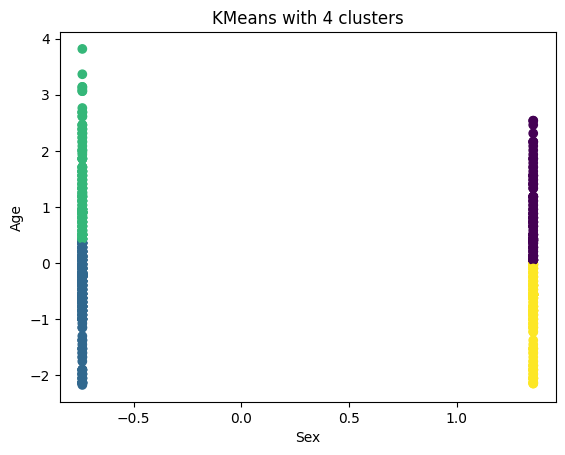

/home/kenobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


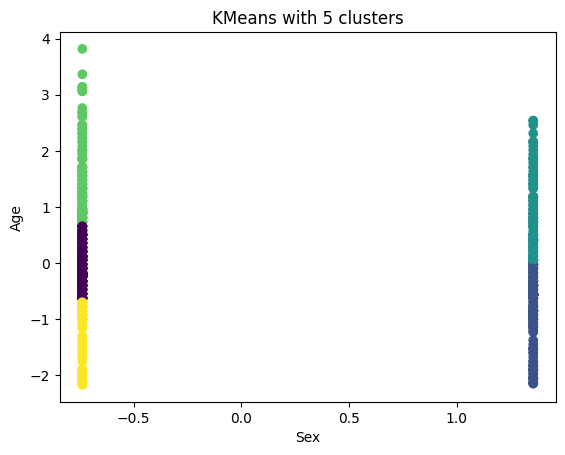

In [83]:
# Clustering using "Sex" and "Age" columns

X3 = data_train[["Sex", "Age"]]
cluster_and_plot(X3, 2, KMeans)
cluster_and_plot(X3, 3, KMeans)
cluster_and_plot(X3, 4, KMeans)
cluster_and_plot(X3, 5, KMeans)

In [84]:
# Conclusion after analyzing the results

# After executing this code, we will get 24 graphs,
# each of which displays the clustering results using the algorithm
# K-Means with different number of clusters and different data columns.

# In general, we can see that clustering based on "Pclass" columns
# and "Fare" gave the best results, especially with use
# the number of clusters is 2-3. These columns obviously have a strong
# connection with the socio-economic status of passengers,
# and therefore can serve as good indicators for predicting that
# will a passenger on the Titanic survive?